<a href="https://colab.research.google.com/github/MSPCode/OTProject/blob/main/AASL_Basic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Some of folium and plotly maps will not render in native GitHub viewer.Please click on **Open in Colab** on the top of notebook if you would live to review it
```

In [1]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import folium
%matplotlib inline

#### Load excel file to create dataframe

In [2]:
excel = pd.ExcelFile("OpenTent Applicant Data Exercise.xlsx")
df = pd.read_excel(excel, 'Data')

#### Format and Re-order the columns

In [3]:
_columns = df.columns.str.replace(' ', '_')

In [4]:
df.columns =_columns

In [5]:
df.head(1)

,Organization_ID,FY_18,FY_19,Unnamed:_3,Nickname,Contact_Type:_Board/Governance,Contact_Type:_Supporters,Contact_Type:_Donors,Preferred_Mailing_City,Payment_Type_in_FY18,Payment_Type_in_FY19,Contact_ID,Preferred_Mailing_State,Referred_by
0,0017000000N2SgJ,100000.0,100000.0,200000.0,David,NaN,NaN,Major Individual Donor,Oakland,Wire Transfer,Wire transfer,0037000000igUG8,CA,Board Member


In [6]:
update_column_order = ['Organization_ID', 
                'Contact_ID','Nickname','Contact_Type:_Board/Governance', 'Contact_Type:_Supporters','Contact_Type:_Donors', 
               'FY_18', 'Payment_Type_in_FY18', 
                'FY_19','Payment_Type_in_FY19', 
                'Preferred_Mailing_City','Preferred_Mailing_State',
                'Referred_by' ]

In [7]:
df = df[update_column_order]

### The statistical description of FY-18 and FY-19 donations

In [8]:
df.describe()

,FY_18,FY_19
count,98.000000,141.000000
mean,3428.624592,2280.819149
std,14184.318587,9507.896992
min,25.000000,10.000000
25%,250.000000,250.000000
50%,1000.000000,1000.000000
75%,1000.000000,1000.000000
max,100000.000000,100000.000000


## David (Oakland, CA) is a superstar donor and has donated the most amount of money in the last two years.

In [9]:
#major donor
df.iloc[df['FY_18'].idxmax()]

Organization_ID                          0017000000N2SgJ
Contact_ID                               0037000000igUG8
Nickname                                           David
Contact_Type:_Board/Governance                       NaN
Contact_Type:_Supporters                             NaN
Contact_Type:_Donors              Major Individual Donor
FY_18                                             100000
Payment_Type_in_FY18                       Wire Transfer
FY_19                                             100000
Payment_Type_in_FY19                       Wire transfer
Preferred_Mailing_City                           Oakland
Preferred_Mailing_State                               CA
Referred_by                                 Board Member
Name: 0, dtype: object

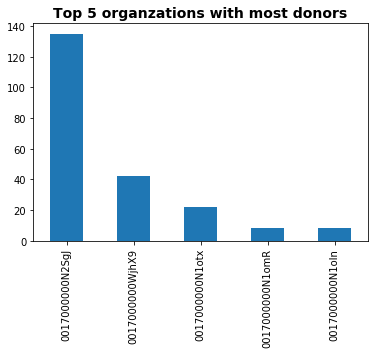

In [10]:
p = pd.Series(df['Organization_ID']).value_counts()[:5].plot(kind="bar")
_ = p.set_title(label='Top 5 organzations with most donors', fontdict= {'fontsize': 14, 'fontweight':'bold'})

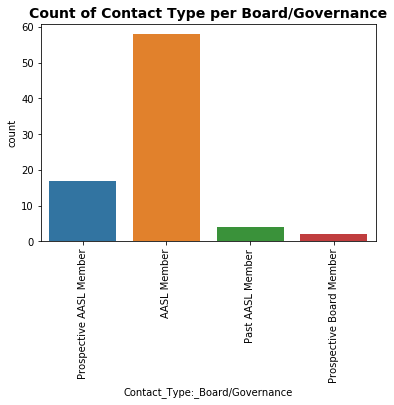

In [11]:
p= sns.countplot(x='Contact_Type:_Board/Governance', data=df)
p.set_title(label='Count of Contact Type per Board/Governance', fontdict= { 'fontsize': 14, 'fontweight':'bold'})
g = p.set_xticklabels(p.get_xticklabels(), rotation=90)

In [12]:
# one of a cell has different naming convention for payment type. Updating it to match the rest of the values.
df['Payment_Type_in_FY19'][250] = 'Wire Transfer'

In [13]:
df.groupby('Payment_Type_in_FY19').sum()

,FY_18,FY_19
Payment_Type_in_FY19,,
Check,82460.00,138145.99
Online,13943.00,21838.00
Stock,1500.01,1611.51
Wire Transfer,0.00,60000.00
Wire transfer,100000.00,100000.00


## Wire Transfer and Checks are the most preferred donation methods, so the organization should ensure that these payment types are readily available to our donors and without any hassles.

In [14]:
# Replace NaN with 0 in FY-18 and FY-19; add together to calculate a total donation amount and identify the top 5 donors.
df['Total_Dontation']= df['FY_18'].fillna(0) + df['FY_19'].fillna(0)

In [15]:
df.sort_values(by=['Total_Dontation'], ascending=False)[['Total_Dontation', 'Nickname']].head(5)

,Total_Dontation,Nickname
0,200000.0,David
1,100000.0,Vinitha
2,50000.0,Debbie
3,30000.0,Peter
4,20000.0,Jeff


## According to the above analysis, top-5 donors are:

| Donor Name | Amount |
| --- | --- |
| David | 200000 |
| Vinitha |100000 |
| Debbie | 50000 |
| Peter | 30000 |
| Jeff | 20000 |






In [16]:
contact_type_supported_distribution= df.groupby('Contact_Type:_Supporters')['Organization_ID'].count()

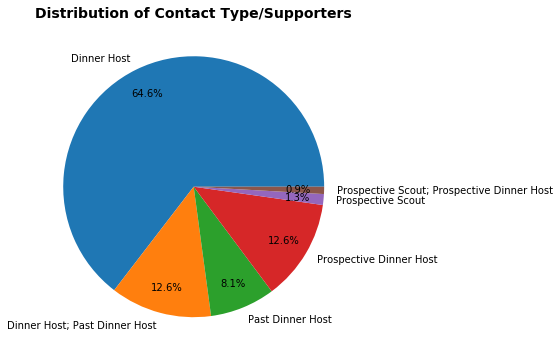

In [17]:
pie, ax = plt.subplots(figsize=[10,6])
labels = contact_type_supported_distribution.keys()
plt.pie(x=contact_type_supported_distribution, autopct="%.1f%%", labels=labels, pctdistance=0.8)
plt.title("Distribution of Contact Type/Supporters", fontdict= { 'fontsize': 14, 'fontweight':'bold'});

### According to the above chart, more than 64% supported hosted dinner in 2019 compared to the past year, only 12%. Since there is a massive improvement in 2019, the organization should continue with the current strategy to increase dinner host counts for the following year.

In [18]:
contact_type_donor_distribution = df.groupby('Contact_Type:_Donors')['Organization_ID'].count().sort_values(ascending=False)[:5]

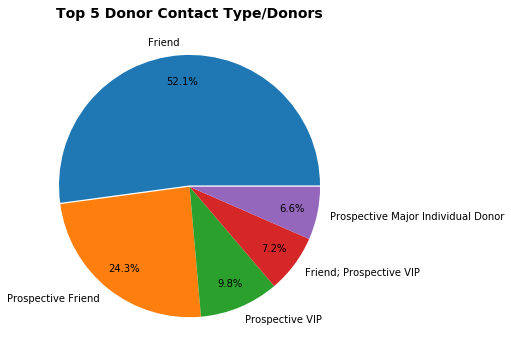

In [19]:
pie, ax = plt.subplots(figsize=[10,6])
labels = contact_type_donor_distribution.keys()
plt.pie(x=contact_type_donor_distribution, explode=(0.01,0,0,0,0),autopct="%.1f%%", labels=labels, pctdistance=0.8)
plt.title("Top 5 Donor Contact Type/Donors", fontdict= { 'fontsize': 14, 'fontweight':'bold'});

In [20]:
referred_by_count = df.groupby('Referred_by')['Organization_ID'].count().sort_values(ascending=False)[:5]

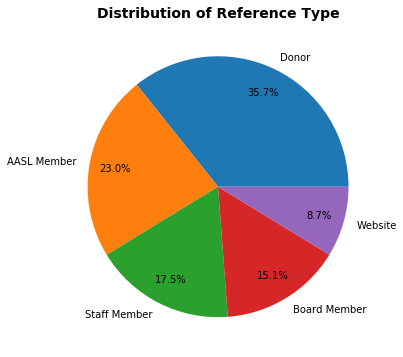

In [21]:
rpie, ax = plt.subplots(figsize=[10,6])
labels = referred_by_count.keys()
plt.pie(x=referred_by_count, autopct="%.1f%%", labels=labels, pctdistance=0.8)
plt.title("Distribution of Reference Type", fontdict= { 'fontsize': 14, 'fontweight':'bold'});

### - According to the above chart, organizations should encourage their existing donors to invite their contacts since that category brought the highest number of referrals.
### - The organization should also increase its online presence and improve its website since that attracted the least number of donors.

In [22]:
 donor_state_count = df.groupby('Preferred_Mailing_State')['Organization_ID'].count().reset_index()

In [23]:
donor_state_count['latitude'] = donor_state_count.apply(lambda _: '', axis=1)
donor_state_count['longitude'] = donor_state_count.apply(lambda _: '', axis=1)

In [24]:
def get_coord(x, type='long'):
    geolocator = Nominatim(user_agent="stu")
    location = geolocator.geocode(x['Preferred_Mailing_State'])
    if location:
        if type =='lat':
            return location.latitude
        else:
            return location.longitude


In [25]:
#donor_state_count['latitude'] =donor_state_count.apply(get_coord, axis=1)
#donor_state_count['longitude'] =donor_state_count.apply(get_coord, axis=1)

In [26]:
donor_state_count =pd.read_csv("location.csv")

In [27]:
map = folium.Map(location=[38, -100], tiles='cartodbpositron' ,zoom_start=3.5, max_zoom=10, width='100%')

title = "<h3 align='center' style='font-size:16px'><b>Current Donors Distribution Across The US and Canada</b></h3>"
for i in donor_state_count.iterrows():
    folium.Circle(
        radius=(int((np.log(i[1]['Organization_ID']+1.001)))+5)*7000,
        location=[i[1]['latitude'], i[1]['longitude']],
        #popup= str(i[1]['Preferred_Mailing_State']),
        tooltip= "<h5 style='text-align':center;font-weight:bold'>"+'State/Province: '+str(i[1]['Preferred_Mailing_State']) + "</h5>"+
                 "<hr style='margin:10px;'"+
                 "<h2 style='color:#444;padding-left=20px;padding-right:20px;text-align:center;font-weight:bold'>"+ 'No. of Donor(s): '+ str(i[1]['Organization_ID']) +"</h2>" ,
        
        
        color="#ff8532",
        fill=False,
    ).add_to(map)

map.get_root().html.add_child(folium.Element(title))
map

### Data Issue(s)

- Donation data is missing for some of the major donors. This should be appropriately identified and filled out in this excel sheet.

- Payment type is misplaced in row-87. We cannot determine which year it belongs to; the same payment type used for FY-18 and FY-19.

In [28]:
# Save updated excel file
#df.to_excel("/Users/user/Documents/project/my_work.xlsx")